# Data preprocessing for training

In [1]:
import pandas as pd

df_class_description = pd.read_csv("data\\oidv7-class-descriptions-boxable.csv")

df_class_description.head()

,LabelName,DisplayName
0,/m/0mkg,Accordion
1,/m/03m3vtv,Adhesive tape
2,/m/0k5j,Aircraft
3,/m/046dlr,Alarm clock
4,/m/0pcr,Alpaca


In [2]:
df_class_description.info()

<class 'pandas.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LabelName    601 non-null    str  
 1   DisplayName  601 non-null    str  
dtypes: str(2)
memory usage: 9.5 KB


In [4]:
import json
with open("data\\bbox_labels_600_hierarchy.csv") as fh:
    box_labels = json.loads(fh.read())


In [5]:
lbl_clothing = df_class_description[df_class_description.DisplayName == "Clothing"].LabelName
lbl_clothing = lbl_clothing.values[0]
lbl_clothing

'/m/09j2d'

In [6]:
# Find Clothing labels
clothing_labels = dict()
sub_cat = box_labels['Subcategory']
for cat in sub_cat:
    if cat["LabelName"] == lbl_clothing:
        clothing_labels = cat["Subcategory"]

In [7]:
# Leave a list of LabelNames
clothing_lbls_list = list()
for cloth_dict in clothing_labels:
    clothing_lbls_list.append(cloth_dict["LabelName"])
    if "Subcategory" in cloth_dict:
        sub_cat = cloth_dict["Subcategory"]
        for sub_cat_dict in sub_cat:
            clothing_lbls_list.append(sub_cat_dict["LabelName"])
            if "Subcategory" in sub_cat_dict:
                sub_sub_cat = sub_cat_dict["Subcategory"]
                sub_sub_list = [sub_sub_cat_dict["LabelName"] for sub_sub_cat_dict in sub_sub_cat]
                clothing_lbls_list = clothing_lbls_list + sub_sub_list

len(clothing_lbls_list)

56

In [8]:
# Get the classes that can be boxed
boxed_clothes = df_class_description[df_class_description["LabelName"].isin(clothing_lbls_list)].values.tolist()
len(boxed_clothes)

48

In [9]:
boxed_clothes[:10]

[['/m/01940j', 'Backpack'],
 ['/m/03grzl', 'Baseball glove'],
 ['/m/0176mf', 'Belt'],
 ['/m/03p3bw', 'Bicycle helmet'],
 ['/m/01b638', 'Boot'],
 ['/m/01gmv2', 'Brassiere'],
 ['/m/0584n8', 'Briefcase'],
 ['/m/01xygc', 'Coat'],
 ['/m/025rp__', 'Cowboy hat'],
 ['/m/0nl46', 'Crown']]

In [10]:
boxed_classID = [boxed_clothes[i][0] for i in range(len(boxed_clothes))]
boxed_classID[:10]

['/m/01940j',
 '/m/03grzl',
 '/m/0176mf',
 '/m/03p3bw',
 '/m/01b638',
 '/m/01gmv2',
 '/m/0584n8',
 '/m/01xygc',
 '/m/025rp__',
 '/m/0nl46']

In [ ]:
import os, os.path

def get_imgs_IDs(source = "", annotations_path = "", list_classes = []):
    """
    Creates a file specifying the images to be downloaded from the source dataset and returns this list.

    Parameters
    ----------
    source : str 
        source dataset name.
    annotations_path : str 
        path to the saved annotations csv file of the respective dataset.
    list_classes : list[str]
        list of LabelNames of the boxable classes.

    Returns
    -------
    boxed_imagesID : list[str] 
        list of images IDs that are to be downloaded.
    """

    df_annotations = pd.read_csv(annotations_path)
    boxed_imagesID = df_annotations[df_annotations["LabelName"].isin(list_classes) & (df_annotations["Confidence"] == 1)]["ImageID"].unique().tolist()

    output_file = os.path.join(os.getcwd(), 'data', source + "_image_list.txt")
    with open(output_file, 'wt') as fh:
        for i in range(len(boxed_imagesID)):
            fh.write(source + "/" + boxed_imagesID[i] + "\n")
            
    return boxed_imagesID

In [17]:
test_annotations_path = "data\\test-annotations-human-imagelabels-boxable.csv"

test_boxed_imagesIDs = get_imgs_IDs("test", test_annotations_path, boxed_classID)
len(test_boxed_imagesIDs)
# python downloader.py "test_image_list.txt" --download_folder="./test_imgs" --num_processes=5

14755

In [18]:
folder_path = os.path.join(os.getcwd(), 'data', 'test_imgs')

test_imgs_downloaded = [name[:-4] for name in os.listdir(folder_path)]
test_matches = set(test_boxed_imagesIDs) & set(test_imgs_downloaded)

print("Images requested: ", len(test_boxed_imagesIDs), "\nImages downloaded: ", len(test_imgs_downloaded), " \nImages both requested and downloaded: ", len(test_matches))

Images requested:  14755 
Images downloaded:  1978  
Images both requested and downloaded:  1978


In [13]:
validation_annotations_path = "data\\validation-annotations-human-imagelabels-boxable.csv"

validation_boxed_imagesIDs = get_imgs_IDs("validation", validation_annotations_path, boxed_classID)
len(validation_boxed_imagesIDs)
# python downloader.py "validation_image_list.txt" --download_folder="./validation_imgs" --num_processes=5

4908

In [14]:
folder_path = os.path.join(os.getcwd(), 'data', 'validation_imgs')

validation_imgs_downloaded = [name[:-4] for name in os.listdir(folder_path)]
validation_matches = set(validation_boxed_imagesIDs) & set(validation_imgs_downloaded)

print("Images requested: ", len(validation_boxed_imagesIDs), "\nImages downloaded: ", len(validation_imgs_downloaded), "\nImages both requested and downloaded: ", len(validation_matches))

Images requested:  4908 
Images downloaded:  660 
Images both requested and downloaded:  660


In [15]:
train_annotations_path = "data\\train-annotations-human-imagelabels-boxable.csv"

train_boxed_imagesIDs = get_imgs_IDs("train", train_annotations_path, boxed_classID)
len(train_boxed_imagesIDs)
# python downloader.py "train_image_list.txt" --download_folder="./train_imgs" --num_processes=5

321758

In [16]:
folder_path = os.path.join(os.getcwd(), 'data', 'train_imgs')

train_imgs_downloaded = [name[:-4] for name in os.listdir(folder_path)]
train_matches = set(train_boxed_imagesIDs) & set(train_imgs_downloaded)

print("Images requested: ", len(train_boxed_imagesIDs), "\nImages downloaded: ", len(train_imgs_downloaded), "\nImages both requested and downloaded: ", len(train_matches))

Images requested:  321758 
Images downloaded:  40556 
Images both requested and downloaded:  40556


## Dataset reduction

Reduction of dataset due to an immense amount of data.

In [19]:
# Loading datasets.
df_val_bb = pd.read_csv("data\\validation-annotations-bbox.csv")
df_test_bb = pd.read_csv("data\\test-annotations-bbox.csv")
df_train_bb = pd.read_csv("data\\oidv6-train-annotations-bbox.csv")

# Reducing datasets to the images actually downloaded.
df_val_bb = df_val_bb[df_val_bb["ImageID"].isin(validation_imgs_downloaded) & df_val_bb["LabelName"].isin(boxed_classID)]
df_test_bb = df_test_bb[df_test_bb["ImageID"].isin(test_imgs_downloaded) & df_test_bb["LabelName"].isin(boxed_classID)]
df_train_bb = df_train_bb[df_train_bb["ImageID"].isin(train_imgs_downloaded) & df_train_bb["LabelName"].isin(boxed_classID)]

# Combine datasets into one general one.
df_bb = pd.concat([df_train_bb, df_test_bb, df_val_bb])

df_bb.info()

<class 'pandas.DataFrame'>
Index: 190899 entries, 40 to 303815
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ImageID      190899 non-null  str    
 1   Source       190899 non-null  str    
 2   LabelName    190899 non-null  str    
 3   Confidence   190899 non-null  int64  
 4   XMin         190899 non-null  float64
 5   XMax         190899 non-null  float64
 6   YMin         190899 non-null  float64
 7   YMax         190899 non-null  float64
 8   IsOccluded   190899 non-null  int64  
 9   IsTruncated  190899 non-null  int64  
 10  IsGroupOf    190899 non-null  int64  
 11  IsDepiction  190899 non-null  int64  
 12  IsInside     190899 non-null  int64  
 13  XClick1X     180495 non-null  float64
 14  XClick2X     180495 non-null  float64
 15  XClick3X     180495 non-null  float64
 16  XClick4X     180495 non-null  float64
 17  XClick1Y     180495 non-null  float64
 18  XClick2Y     180495 non-null  float64
 

Let's see the distribution of images

In [20]:
import matplotlib.pyplot as plt

def plot_label_dist(counts = pd.Series(), classes_disp = dict(), n_labels = 30):
    counts.head(n_labels).rename(classes_disp).plot(kind="bar", figsize=(14, 6))

    plt.ylabel("Number of Images")
    plt.xlabel("Label")
    plt.title(f"Top {n_labels} Labels by Number of Images")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [21]:
dic_boxed_classes_disp = {label_name: display_name for label_name, display_name in boxed_clothes}
dic_boxed_classes_disp

{'/m/01940j': 'Backpack',
 '/m/03grzl': 'Baseball glove',
 '/m/0176mf': 'Belt',
 '/m/03p3bw': 'Bicycle helmet',
 '/m/01b638': 'Boot',
 '/m/01gmv2': 'Brassiere',
 '/m/0584n8': 'Briefcase',
 '/m/01xygc': 'Coat',
 '/m/025rp__': 'Cowboy hat',
 '/m/0nl46': 'Crown',
 '/m/01d40f': 'Dress',
 '/m/01r546': 'Earring',
 '/m/0463sg': 'Fashion accessory',
 '/m/02fq_6': 'Fedora',
 '/m/07qxg_': 'Football helmet',
 '/m/09j5n': 'Footwear',
 '/m/0jyfg': 'Glasses',
 '/m/0174n1': 'Glove',
 '/m/02_n6y': 'Goggles',
 '/m/080hkjn': 'Handbag',
 '/m/02dl1y': 'Hat',
 '/m/0zvk5': 'Helmet',
 '/m/06k2mb': 'High heels',
 '/m/032b3c': 'Jacket',
 '/m/0fly7': 'Jeans',
 '/m/0hf58v5': 'Luggage and bags',
 '/m/01cmb2': 'Miniskirt',
 '/m/01llwg': 'Necklace',
 '/m/02p3w7d': 'Roller skates',
 '/m/03nfch': 'Sandal',
 '/m/02h19r': 'Scarf',
 '/m/01n4qj': 'Shirt',
 '/m/01bfm9': 'Shorts',
 '/m/02wv6h6': 'Skirt',
 '/m/01nq26': 'Sock',
 '/m/02jfl0': 'Sombrero',
 '/m/0h8mhzd': 'Sports uniform',
 '/m/01xyhv': 'Suit',
 '/m/01s55n': 'Su

In [22]:
dist_label = df_bb.groupby("LabelName")["ImageID"].nunique().sort_values(ascending=False)
dist_label[:10]

LabelName
/m/09j5n     19208
/m/01xyhv     6305
/m/0jyfg      6005
/m/01d40f     4738
/m/0fly7      4408
/m/0463sg     3693
/m/017ftj     2094
/m/032b3c     1728
/m/0zvk5      1266
/m/02dl1y     1224
Name: ImageID, dtype: int64

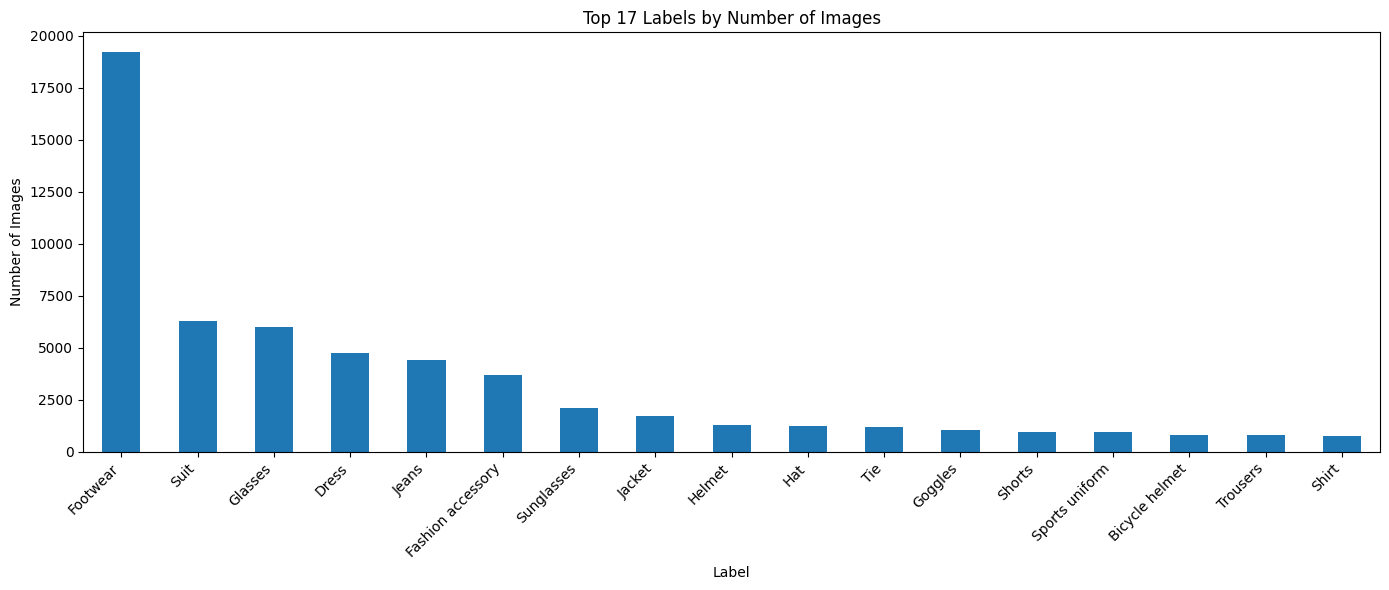

In [23]:
plot_label_dist(dist_label, dic_boxed_classes_disp, len(dist_label))

Reduction of the dataset.
1. Reduction by mean value of elements.
2. Reduction by classes that have very low representation.

In [24]:
# Downsampling of the images:
# Reducing the total number of images in the dataset to only 50k

# Get the IDs of images selected:
import random

random.seed(101)

all_imgs_IDs = df_bb["ImageID"].unique().tolist()
sel_imgs_IDs = random.sample(all_imgs_IDs, 10000)
len(sel_imgs_IDs)

10000

In [25]:
df_bb = df_bb[df_bb["ImageID"].isin(sel_imgs_IDs)]
dist_label_down = df_bb.groupby("LabelName")["ImageID"].nunique().sort_values(ascending=False)
dist_label_down.head(10), dist_label_down.tail(10)

(LabelName
 /m/09j5n     4425
 /m/01xyhv    1493
 /m/0jyfg     1416
 /m/01d40f    1123
 /m/0fly7      995
 /m/0463sg     800
 /m/017ftj     476
 /m/032b3c     394
 /m/0zvk5      311
 /m/02dl1y     292
 Name: ImageID, dtype: int64,
 LabelName
 /m/032b3c     394
 /m/0zvk5      311
 /m/02dl1y     292
 /m/01rkbr     269
 /m/01bfm9     227
 /m/0h8mhzd    227
 /m/02_n6y     226
 /m/03p3bw     200
 /m/01n4qj     177
 /m/07mhn      169
 Name: ImageID, dtype: int64)

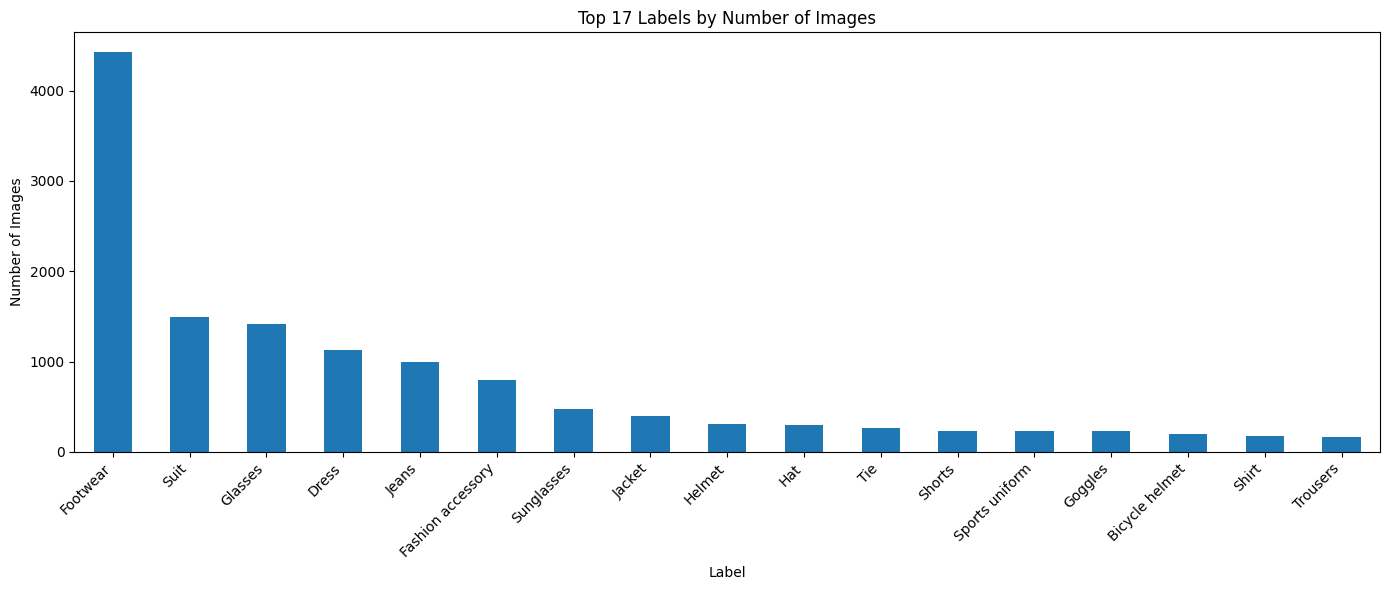

In [26]:
plot_label_dist(dist_label_down, dic_boxed_classes_disp, len(dist_label_down))

In [27]:
dist_label_down.mean()

np.float64(777.6470588235294)

In [28]:
# Select only classes that have a representation in the data, will be done by removal of the images having nonselected classes.
min_val = dist_label_down.mean().__int__() 
non_sel_label_down = dist_label_down[dist_label_down < min_val].index.to_list()
print("Number of labels not selected: ", len(non_sel_label_down))

Number of labels not selected:  11


In [29]:
non_sel_imgs = df_bb[df_bb["LabelName"].isin(non_sel_label_down)]["ImageID"].unique().tolist()
print("Number of images to eliminate: ", len(non_sel_imgs))

Number of images to eliminate:  2572


In [30]:
df_bb = df_bb.drop(df_bb[df_bb["ImageID"].isin(non_sel_imgs)].index)

dist_label_down_rc = df_bb.groupby("LabelName")["ImageID"].nunique().sort_values(ascending=False)
dist_label_down_rc[:10], dist_label_down_rc[-10:]

(LabelName
 /m/09j5n     3893
 /m/01xyhv    1212
 /m/01d40f    1073
 /m/0jyfg     1066
 /m/0fly7      831
 /m/0463sg     751
 Name: ImageID, dtype: int64,
 LabelName
 /m/09j5n     3893
 /m/01xyhv    1212
 /m/01d40f    1073
 /m/0jyfg     1066
 /m/0fly7      831
 /m/0463sg     751
 Name: ImageID, dtype: int64)

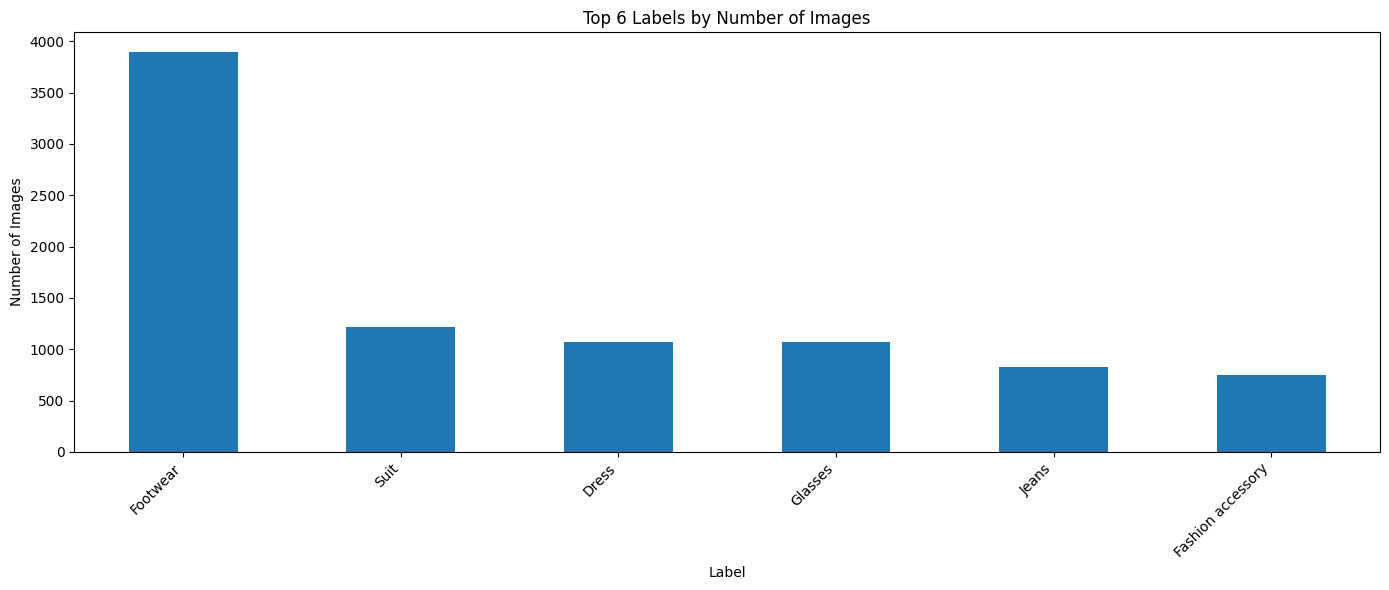

In [31]:
plot_label_dist(dist_label_down_rc, dic_boxed_classes_disp, len(dist_label_down_rc))

In [32]:
# List of selected labels.
sel_labels = dist_label_down_rc.index.to_list()

In [33]:
tot_imgs = df_bb["ImageID"].nunique()
tot_prev = df_val_bb["ImageID"].nunique() + df_test_bb["ImageID"].nunique() + df_train_bb["ImageID"].nunique()
print("Total number of images: prev=", tot_prev, "after=", tot_imgs)

Total number of images: prev= 43194 after= 7426


In [34]:
df_val_bb_red = df_bb[df_bb["ImageID"].isin(validation_boxed_imagesIDs) & df_bb["LabelName"].isin(sel_labels)]
print("Validation: prev= ", df_val_bb["ImageID"].nunique(), " after= ", df_val_bb_red["ImageID"].nunique())

Validation: prev=  660  after=  104


In [35]:
df_test_bb_red = df_bb[df_bb["ImageID"].isin(test_boxed_imagesIDs) & df_bb["LabelName"].isin(sel_labels)]
print("Test: prev= ", df_test_bb["ImageID"].nunique(), " after= ", df_test_bb_red["ImageID"].nunique())

Test: prev=  1978  after=  281


In [36]:
df_train_bb_red = df_bb[df_bb["ImageID"].isin(train_imgs_downloaded) & df_bb["LabelName"].isin(sel_labels)]
print("Train: prev= ", df_train_bb["ImageID"].nunique(), " after= ", df_train_bb_red["ImageID"].nunique())

Train: prev=  40556  after=  7041


Since the images were already downloaded, the following is the removal of the images that are not going to be used for the training.

In [37]:
val_sel_imgs_IDs = df_val_bb_red["ImageID"].unique().tolist()
validation_removed = [img_ID for img_ID in set(validation_imgs_downloaded) if img_ID not in val_sel_imgs_IDs]
print("Validation dataset:","\nTotal Images: ", len(validation_imgs_downloaded), ", Images to be removed: ", len(validation_removed), ", Images selected for training: ", len(val_sel_imgs_IDs))

Validation dataset: 
Total Images:  660 , Images to be removed:  556 , Images selected for training:  104


In [38]:
test_sel_imgs_IDs = df_test_bb_red["ImageID"].unique().tolist()
test_removed = [img_ID for img_ID in set(test_imgs_downloaded) if img_ID not in test_sel_imgs_IDs]
print("Test dataset:","\nTotal Images: ", len(test_imgs_downloaded), ", Images to be removed: ", len(test_removed), ", Images selected for training: ", len(test_sel_imgs_IDs))

Test dataset: 
Total Images:  1978 , Images to be removed:  1697 , Images selected for training:  281


In [39]:
train_sel_imgs_IDs = df_train_bb_red["ImageID"].unique().tolist()
train_removed = [img_ID for img_ID in set(train_imgs_downloaded) if img_ID not in train_sel_imgs_IDs]
print("Train dataset:","\nTotal Images: ", len(train_imgs_downloaded), ", Images to be removed: ", len(train_removed), ", Images selected for training: ", len(train_sel_imgs_IDs))

Train dataset: 
Total Images:  40556 , Images to be removed:  33515 , Images selected for training:  7041


In [40]:
from pathlib import Path
import shutil

def remove_images(
    image_ids,
    folder,
    dry_run=True,
    move_to=None
):
    """
    Remove or move images whose filenames match given image IDs.

    Parameters
    ----------
    image_ids : iterable
        List/Series/set of image IDs (without extension).
    folder : str or Path
        Path to image directory.
    dry_run : bool
        If True, only prints what would be removed.
    move_to : str or Path or None
        If provided, files are moved instead of deleted.

    Returns
    -------
    int : number of affected files
    """

    folder = Path(folder)
    image_ids = set(map(str, image_ids))  # fast lookup

    if move_to:
        move_to = Path(move_to)
        move_to.mkdir(parents=True, exist_ok=True)

    count = 0
    ext = ".jpg"
    for img_id in image_ids:
        file_path = folder / f"{img_id}{ext}"

        if file_path.exists():
            if dry_run:
                print(f"[DRY RUN] Would remove: {file_path}")
            else:
                if move_to:
                    shutil.move(str(file_path), move_to / file_path.name)
                else:
                    file_path.unlink()

            count += 1
            #break

    print(f"{'Found' if dry_run else 'Processed'} {count} images")
    return count

In [41]:
remove_images(validation_removed, "data\\validation_imgs/", dry_run=True) # Check functionality of the implemented function.

[DRY RUN] Would remove: data\validation_imgs\97b57bf58e7b224d.jpg
[DRY RUN] Would remove: data\validation_imgs\432addb8f0bcbfdd.jpg
[DRY RUN] Would remove: data\validation_imgs\2a216033da9d4623.jpg
[DRY RUN] Would remove: data\validation_imgs\f2fbceebb45c2260.jpg
[DRY RUN] Would remove: data\validation_imgs\b3455254b3790813.jpg
[DRY RUN] Would remove: data\validation_imgs\c8e41462f79ac2f0.jpg
[DRY RUN] Would remove: data\validation_imgs\7f50b68075ebd257.jpg
[DRY RUN] Would remove: data\validation_imgs\c797b29af6a19847.jpg
[DRY RUN] Would remove: data\validation_imgs\86c5af17b32eef57.jpg
[DRY RUN] Would remove: data\validation_imgs\e142ebef56b628b4.jpg
[DRY RUN] Would remove: data\validation_imgs\69a83a4f4fe1f3d3.jpg
[DRY RUN] Would remove: data\validation_imgs\105c98d1ee5f03ef.jpg
[DRY RUN] Would remove: data\validation_imgs\26b1b1b10ceca034.jpg
[DRY RUN] Would remove: data\validation_imgs\f219f22997dc6a79.jpg
[DRY RUN] Would remove: data\validation_imgs\a441f394c17813cf.jpg
[DRY RUN] 

556

Images selected will be insetad moved to a general location for further preprocessing into YOLO format

In [42]:
rem_imgs = remove_images(val_sel_imgs_IDs, "data\\validation_imgs\\", dry_run=False, move_to="yolo_model\\data")
print("Removed Images: ", rem_imgs)

Processed 104 images
Removed Images:  104


In [43]:
rem_imgs = remove_images(test_sel_imgs_IDs, "data\\test_imgs\\", dry_run=False, move_to="yolo_model\\data")
print("Moved Images: ", rem_imgs)

Processed 281 images
Moved Images:  281


In [44]:
rem_imgs = remove_images(train_sel_imgs_IDs, "data\\train_imgs\\", dry_run=False, move_to="yolo_model\\data")
print("Moved Images: ", rem_imgs)

Processed 7041 images
Moved Images:  7041


Save the processed dataframes for the posterior training.

In [45]:
df_train_bb_red.to_csv("yolo_model\\sel_train_bb_10k.csv", index=False)
df_test_bb_red.to_csv("yolo_model\\sel_test_bb_10k.csv", index=False)
df_val_bb_red.to_csv("yolo_model\\sel_validation_bb_10k.csv", index=False)

Now the data needs to be organized in a specific way that will allow us to perform the YOLO training.